In [1]:
# Add matplotlib inline magic command to have interactive graphs
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create variables that will contain the files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read and save the city data as a data frame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#Read and save the ride data as a data frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# See if there are any null values in city data
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Check type of city data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get all the unique types of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Count the number of urban cities
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Count the number of suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# Count the number of rural cities
sum(city_data_df["type"]=="Rural")

18

In [11]:
# See if there are any null values in ride data
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Merge the two data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

In [14]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Separate the data frame into three data frames by city type
Urban_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
Suburban_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
Rural_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [16]:
# Get the number of rides for each type of city by city
urban_ride_count = Urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = Suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = Rural_df.groupby(["city"]).count()["ride_id"]

In [17]:
# Get the average fare for each type of city by city
urban_avg_fare = Urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = Suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = Rural_df.groupby(["city"]).mean()["fare"]

In [18]:
# Get the average number of driver for each type of city by city
urban_avg_driver = Urban_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver = Suburban_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver = Rural_df.groupby(["city"]).mean()["driver_count"]

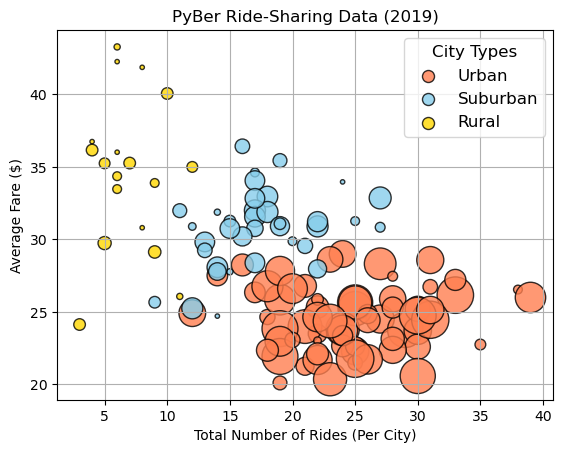

In [19]:
# Create the scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_avg_driver,
           c="coral",
           ec="black",
           lw=1,
           alpha=0.8,
           label= "Urban")

# Create the scatter plot for Suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_avg_driver,
           c="skyblue",
           ec="black",
           lw=1,
           alpha=0.8,
           label= "Suburban")

# Create the scatter plot for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_avg_driver,
           c="gold",
           ec="black",
           lw=1,
           alpha=0.8,
           label= "Rural")

# Add title and axis titles
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add gridlines and a lengen
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Show the plot
plt.show()

# Create note about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the plot
plt.savefig("Fig1.png")